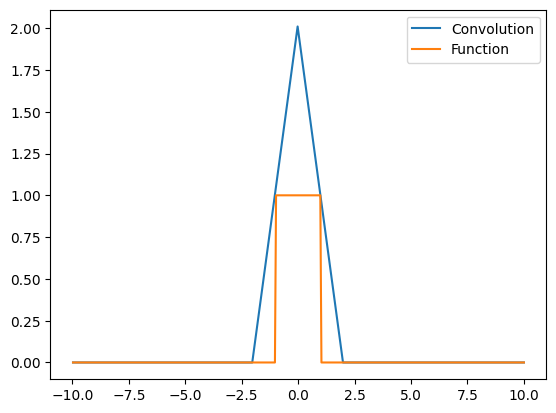

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def custom_function(x):
    if -1 < x < 1:
        return 1
    else:
        return 0

xmin_value = -5
xmax_value = 5
num_points = 200
delta_x = (xmax_value - xmin_value) / (num_points - 1)

x_values, sample_values = [], []
for i in range(num_points):
    sample_values.append(custom_function(xmin_value + i * delta_x))
    x_values.append(xmin_value + i * delta_x)

xmin_value = x_values[0]
xmax_value = x_values[-1]
for i in range(num_points):
    sample_values.append(0)
    if i < num_points / 2:
        x_values.append(xmin_value - i * delta_x)
    else:
        x_values.append(i * delta_x)

x_values.sort()

dft_result = np.fft.fft(sample_values, norm='ortho')

product_result = []
for i in range(2 * num_points):
    product_result.append(dft_result[i] ** 2)

convolution_result = delta_x * (2 * num_points) ** 0.5 * np.fft.ifft(product_result, norm='ortho')

shifted_sample_values = np.zeros(2 * num_points)
for k in range(num_points):
    shifted_sample_values[int(num_points / 2) + k] = sample_values[k]

plt.plot(x_values, convolution_result, label='Convolution')
plt.plot(x_values, shifted_sample_values, label='Function')
plt.legend()
plt.show()
